# Pre-processing - making the dataset 

In [3]:
# -*- coding: utf-8 -*-


import os
from __future__ import print_function
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Disclaimer. Images are taken from the ImageCEF collaboration from [give link here]()

Plain black-and-white (two level) images should never be converted to JPEG; they violate all of the conditions given above. You need at least about 16 grey levels before JPEG is useful for grey-scale images. It should also be noted that GIF is lossless for grey-scale images of up to 256 levels, while JPEG is not.

References

[Plankton Image Classification](https://benanne.github.io/2015/03/17/plankton.html)
[github](https://github.com/benanne/kaggle-ndsb)

In [18]:
curr_dir = %pwd
proj_dir = os.path.normpath(os.path.join(curr_dir, os.path.pardir))
image_data_path = "data/raw/ImageData.csv"
input_filepath = os.path.normpath(os.path.join(proj_dir, image_data_path))

In [19]:
df = pd.read_csv(input_filepath, header=None, delimiter=";", names=["image", "class"],encoding='utf-8')

In [20]:
df["class"].unique()

array(['Body', 'Head-Neck', 'Lower-Limb', 'Upper-Limb', 'True-Negative'], dtype=object)

#### Classes
We have now made it possible to attach each image to it's corresponding class

Body - the body of human

Head-Neck - Head and neck

Lower-limb - the lower part of a human body

Upper-limb - upper part of a human body

True-Negative - Image taken with the same x-ray camera that contains non-body parts are considered as true negative.


In [21]:
df.head()

,image,class
0,10.1224.176.125.112.16.201109071451150.jpeg,Body
1,10.1224.176.125.112.16.201109071557120.1.jpeg,Body
2,10.1224.176.125.112.16.201109081127120.1.jpeg,Body
3,10.1224.176.125.112.16.201109081127121.1.jpeg,Body
4,10.1224.176.125.112.16.20110908123224.4.jpeg,Body


# strip whitespaces

In [22]:
df["image"] = df["image"].map(str.strip)

In [34]:
raw_images = 'data/raw/Image_Downscaled'
raw_storage = os.path.abspath(os.path.join(proj_dir, raw_images))

In [35]:
import scipy.misc
image = scipy.misc.imread(raw_storage + '/' + str(df['image'][0]), mode='L')

In [36]:
image.shape

(1189, 1600)

In [37]:
image[0,:]

array([0, 0, 0, ..., 1, 1, 1], dtype=uint8)

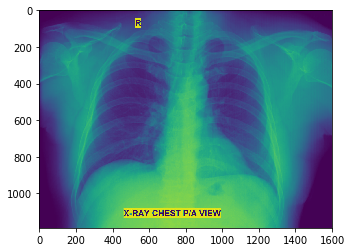

In [38]:
plt.imshow(image)

## Convert image filenames into np.arrays

In [42]:
os.chdir(raw_storage)
from functools import partial

df['image'] = df['image'].map(partial(scipy.misc.imread, mode='L'))

In [43]:
df.head()

,image,class
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Body
1,"[[1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2,...",Body
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,...",Body
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2,...",Body
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Body


### creation of the train and test sets of the images

In [44]:
df['image'][0].max()

255

resizing for less of size of the images

In [45]:
class_dict = {'Body': 0,
 'Head-Neck': 1,
 'Lower-Limb': 2,
 'Upper-Limb': 3,
 'True-Negative': 4}

In [47]:
train_shuffled_images = []
test_shuffled_images = []

test_percentage = 0.2

for key, value in class_dict.items():
    class_images = df[df['class'] == key]['image'].tolist()
    print(len(class_images))
    #np.random.shuffle(shuffled)

    k = int(len(class_images) * test_percentage)
    print(k)
    test_shuffled_images = test_shuffled_images + class_images[0:k]
    train_shuffled_images = train_shuffled_images + class_images[k:]

100
20
100
20
100
20
100
20
100
20


# preprocessing of the images

util function to create the directory

In [109]:
import os
import errno

def make_sure_path_exists(path):
    try:
        os.makedirs(path)
    except OSError as exception:
        if exception.errno != errno.EEXIST:
            raise

### Resizing of the images for test and training

In [51]:
import scipy.misc

In [52]:
train_images = [scipy.misc.imresize(image, (100,50)) for image in train_shuffled_images]
test_images = [scipy.misc.imresize(image, (100,50)) for image in test_shuffled_images]

##### creation of the train and test folders for keras to use .flow_from_directory method

In [65]:
os.chdir(proj_dir)
test_dir = 'data/processed/test'
train_dir = 'data/processed/train'
class_feature = ['Body','Head-Neck','Lower-Limb','Upper-Limb','True-Negative']

In [72]:
def put_class_images_in_folders(save_dir, image_list):
    counter = 0
    class_counter = 0
    first = True

    make_sure_path_exists(save_dir)

    for image in image_list:
        counter += 1

        if (counter % int(len(image_list) / len(class_feature)) == 0) and (first == False) != (counter == int(len(image_list))):
            print(counter)
            class_counter += 1
        first = False

        class_dir = os.path.join(save_dir,class_feature[class_counter])
        make_sure_path_exists(class_dir)

        save_image = os.path.join(class_dir,'{}_{}.jpeg'.format(class_feature[class_counter],"".join((map(str,np.random.randint(0,9,8))))))

        scipy.misc.imsave(save_image, image)

In [71]:
def put_test_class_images_in_folders(save_dir, image_list):
    counter = 0
    class_counter = 0
    first = True

    make_sure_path_exists(save_dir)

    for image in image_list:
        counter += 1

        if (counter % int(len(image_list) / len(class_feature)) == 0) and (first == False) != (counter == int(len(image_list))):
            print(counter)
            class_counter += 1
        first = False

        class_dir = os.path.join(save_dir,class_feature[class_counter])
        make_sure_path_exists(class_dir)

        save_image = os.path.join(class_dir,'{}_{}.jpeg'.format(class_feature[class_counter],"".join((map(str,np.random.randint(0,9,8))))))

        scipy.misc.imsave(save_image, image)

In [68]:
import itertools


def put_classes_into_separate_folders(parent_dir, images):
    make_sure_path_exists(parent_dir)
    
    

In [69]:
mydict = dict(zip(df['class'],df['image']))

In [70]:
put_test_class_images_in_folders(test_dir, test_images)
put_class_images_in_folders(train_dir, train_images)

20
40
60
80
80
160
240
320
